### Determing which hog_channel performs better.

In this notebook, I will determine which hog_channel performs better. LUV color space is used. All other feature extraction parameters are unchanged.

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import time
from sklearn.svm import LinearSVC
import numpy as np

from project_modules.feature_extraction import *
from project_modules.model import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Parameters for feature extraction
color_space = 'LUV'
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [480, None] # Min and max in y to search in slide_window()

cars, notcars = get_train_data()

In [7]:
hog_channels = [0, 1, 2, 'ALL']
results=[]
hog_channel_name = []

for hog_channel in hog_channels:
    t=time.time()
    print('Extracting features for hog_channel: {}'.format(hog_channel))
    car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
    notcar_features = extract_features(notcars, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)

    X = np.vstack((car_features, notcar_features)).astype(np.float64)
    y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to extract features...\nStarting model training\n')
    rand_state = np.random.randint(0, 100)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

    t=time.time()
    svc_scores = svc_model(X_train, y_train)
    t2 = time.time()
    print(round(t2-t, 2), 'Seconds to train SVC...')
    msg = '{}: {:.4f} ({:.4f})\n'.format(color_space, svc_scores.mean(), svc_scores.std())
    print(msg)
    print('=====\n')
    results.append(svc_scores)
    hog_channel_name.append(hog_channel)



Extracting features for hog_channel: 0
40.36 Seconds to extract features...
Starting model training

31.62 Seconds to train SVC...
LUV: 0.9662 (0.0030)

=====

Extracting features for hog_channel: 1
39.24 Seconds to extract features...
Starting model training

31.49 Seconds to train SVC...
LUV: 0.9659 (0.0033)

=====

Extracting features for hog_channel: 2
39.42 Seconds to extract features...
Starting model training

38.43 Seconds to train SVC...
LUV: 0.9494 (0.0025)

=====

Extracting features for hog_channel: ALL
100.18 Seconds to extract features...
Starting model training

70.93 Seconds to train SVC...
LUV: 0.9815 (0.0018)

=====



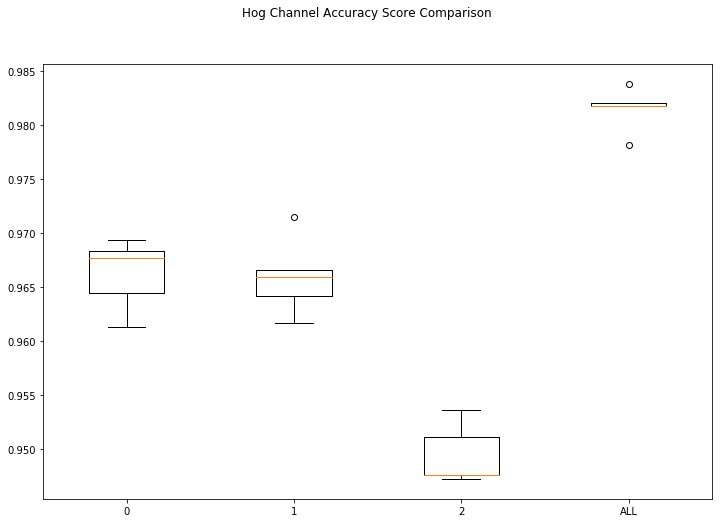

In [8]:
# Compare Color Spaces
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
fig.suptitle('Hog Channel Accuracy Score Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(hog_channel_name)
plt.show()

Based on these results, I will investigate the LUV color space use ALL hog channels further.